In [7]:
%config IPCompleter.greedy=True

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### 기본 이미지

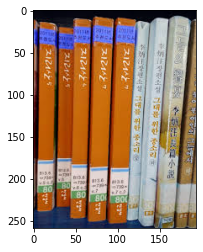

In [3]:
img_path = os.getenv('HOME')+'/repo/LibRobo/data/img/lib_11.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

### Crop

In [4]:
img2 = img.copy()
h, w = img.shape[:2]

cropped_img = img2[155:, :]

### Gray Scale Conversion

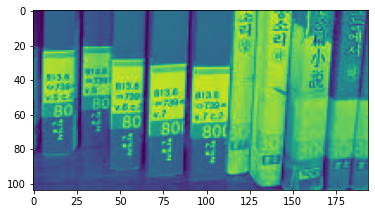

In [26]:
imgray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)

### Edge-Preserved Smoothing

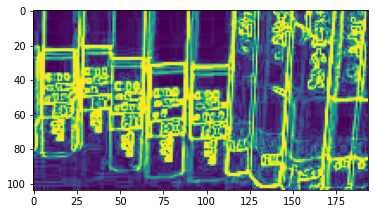

In [37]:
img_sobel_x = cv2.Sobel(imgray, cv2.CV_64F, 1, 0, ksize=3) 
img_sobel_x = cv2.convertScaleAbs(img_sobel_x) 
img_sobel_y = cv2.Sobel(imgray, cv2.CV_64F, 0, 1, ksize=3) 
img_sobel_y = cv2.convertScaleAbs(img_sobel_y) 
img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0) 
plt.imshow(img_sobel) 

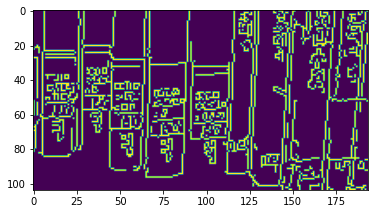

In [38]:
edges = cv2.Canny(imgray, 100, 200 )
plt.imshow(edges) 

### Morphological Operations

#### Opening

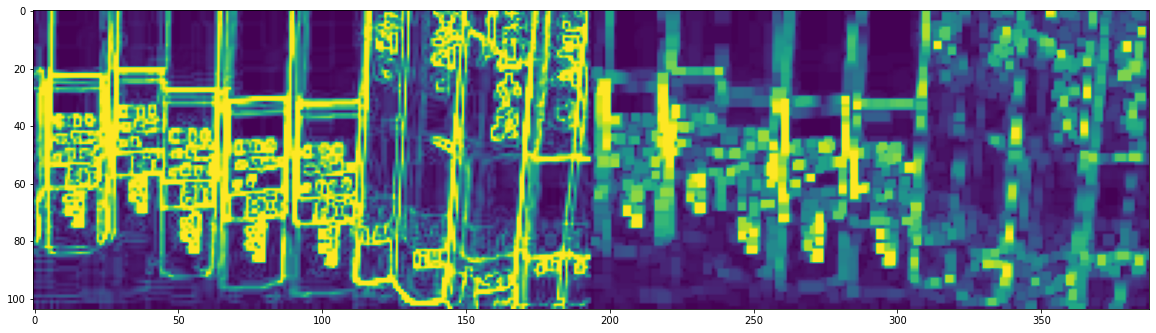

In [43]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(img_sobel, cv2.MORPH_OPEN, kernel)

merged = np.hstack((img_sobel, opening))
plt.figure(figsize=(20, 20))
plt.imshow(merged)

#### Closing

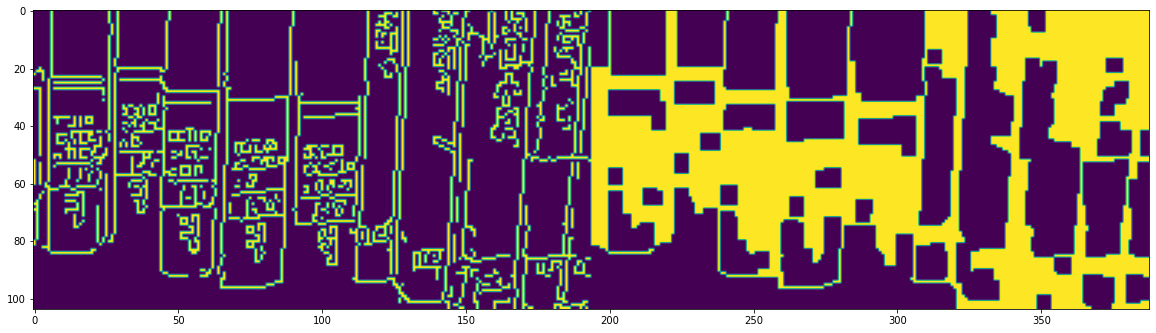

In [44]:
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

merged = np.hstack((edges, closing))
plt.figure(figsize=(20, 20))
plt.imshow(merged)

### Binarization

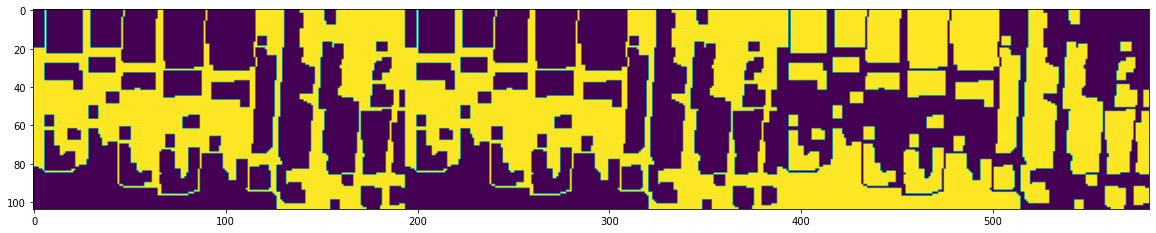

In [45]:
et,img_result1 = cv2.threshold(closing, 127, 255, cv2.THRESH_BINARY)
ret,img_result2 = cv2.threshold(closing, 127, 255, cv2.THRESH_BINARY_INV)

merged = np.hstack((closing, img_result1, img_result2))
plt.figure(figsize=(20, 20))
plt.imshow(merged)

### Rectangle Region Detection

In [47]:
contours, _ = cv2.findContours(img_result1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cont in contours:
    approx = cv2.approxPolyDP(cont, cv2.arcLength(cont, True)*0.02, True)
    vtc = len(approx)
    
    print(vtc)

8
